In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import yfinance as yf
from datetime import datetime

# Importing the dataset

In [2]:
# Set the ticker symbol for Bank Nifty
ticker = "AMD"

# Download the data from Yahoo Finance for a specific date range
data = yf.download(ticker, start="2015-01-01", end=datetime.today())

[*********************100%***********************]  1 of 1 completed


In [3]:
data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-01-02,2.670000,2.670000,2.670000,2.670000,2.670000,0
2015-01-05,2.670000,2.700000,2.640000,2.660000,2.660000,8878200
2015-01-06,2.650000,2.660000,2.550000,2.630000,2.630000,13912500
2015-01-07,2.630000,2.650000,2.540000,2.580000,2.580000,12377600
2015-01-08,2.590000,2.650000,2.560000,2.610000,2.610000,11136600
...,...,...,...,...,...,...
2023-05-02,89.320000,90.459999,88.120003,89.910004,89.910004,70483500
2023-05-03,83.540001,85.480003,81.019997,81.620003,81.620003,109482200
2023-05-04,81.570000,91.639999,81.110001,86.610001,86.610001,122840500


# Data Preprocessing

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2101 entries, 2015-01-02 to 2023-05-08
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       2101 non-null   float64
 1   High       2101 non-null   float64
 2   Low        2101 non-null   float64
 3   Close      2101 non-null   float64
 4   Adj Close  2101 non-null   float64
 5   Volume     2101 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 114.9 KB


In [5]:
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-01-02,2.67,2.67,2.67,2.67,2.67,0
2015-01-05,2.67,2.70,2.64,2.66,2.66,8878200
2015-01-06,2.65,2.66,2.55,2.63,2.63,13912500
2015-01-07,2.63,2.65,2.54,2.58,2.58,12377600
2015-01-08,2.59,2.65,2.56,2.61,2.61,11136600


In [6]:
data.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-05-02,89.320000,90.459999,88.120003,89.910004,89.910004,70483500
2023-05-03,83.540001,85.480003,81.019997,81.620003,81.620003,109482200
2023-05-04,81.570000,91.639999,81.110001,86.610001,86.610001,122840500
2023-05-05,84.989998,90.430000,84.720001,89.839996,89.839996,78407400
2023-05-08,89.989998,95.660004,89.169998,95.040001,95.040001,95380600


In [7]:
data.shape

(2101, 6)

In [8]:
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2101.000000,2101.000000,2101.000000,2101.000000,2101.000000,2.101000e+03
mean,42.406987,43.292351,41.488363,42.408482,42.408482,5.817648e+07
std,39.512951,40.331118,38.631171,39.494439,39.494439,3.842087e+07
min,1.620000,1.690000,1.610000,1.620000,1.620000,0.000000e+00
25%,10.280000,10.540000,9.970000,10.280000,10.280000,3.384800e+07
50%,26.980000,27.709999,26.400000,27.240000,27.240000,5.122360e+07
75%,79.639999,81.110001,77.940002,79.059998,79.059998,7.726130e+07
max,163.279999,164.460007,156.100006,161.910004,161.910004,3.250584e+08


# Missing values

In [9]:
data.isnull().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [10]:
import plotly.express as px
import matplotlib.pyplot as plt

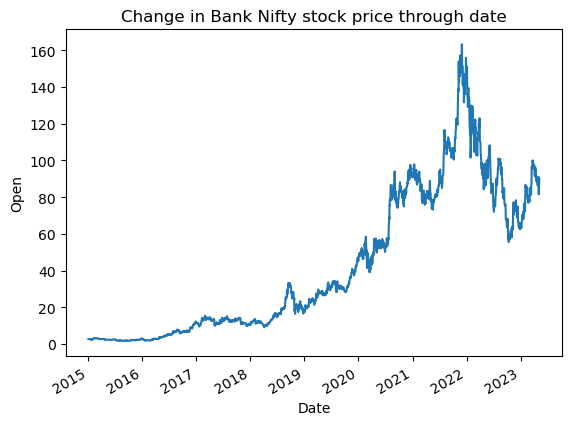

In [11]:

# plot price of gold for each increasing day
data["Open"].plot()
plt.title("Change in Bank Nifty stock price through date")
plt.xlabel("Date")
plt.ylabel("Open")
plt.show()

# Splitting X and Y into taining and testing varaibles

In [12]:
X=data[['Open','High','Low']]
y=data['Close']

In [13]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25)

In [14]:
X_train.shape,X_test.shape


((1575, 3), (526, 3))

In [15]:
y_train.shape,y_test.shape

((1575,), (526,))

# Random Forest

In [16]:
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

In [17]:
regressor = RandomForestRegressor(n_estimators=100)

In [18]:
regressor.fit(X_train,y_train)

RandomForestRegressor()

In [19]:
# prediction on Test Data
test_data_prediction = regressor.predict(X_test)

In [20]:
print(test_data_prediction)

[ 65.54740105  97.16830032  89.27859833  88.64539902  22.98499935
 119.65630035  20.00329966  11.3051       2.32279993   1.71480003
  73.95340042   1.86809999   2.31184496   2.92290006  12.06719997
  28.21319971  56.74919941  93.38719971  38.9087001   86.66910042
  89.68130188  98.62249931   2.77179998  10.02800017  30.14529976
  94.6134977    2.9183      11.80230009  34.16960007  45.79150047
  85.32680054   2.5159     126.02669769  14.96820005  86.59549927
   2.61465997  22.48219997  16.64880022  84.13300034   2.07459997
  79.44740067  19.62069965  79.41769928  50.69529907  76.67390038
  11.86109985 121.61560158  81.42500023  12.89400002  27.81730022
   3.06169994  81.04620064  54.50529919  52.31690063   2.76389999
   9.84549992  30.08910034   5.96860003  32.39789993  13.92059989
   2.31699994  20.4233997   88.29290009  22.96269958  59.66359951
  13.56979991  12.96080019   4.89470006  86.37839996  57.74179981
 145.74849655  90.09429962  98.18490036  50.56259918  81.42859955
  10.23120

In [21]:
# R squared errorY
error_score = metrics.r2_score(y_test, test_data_prediction)
print("R squared error : ", error_score)

R squared error :  0.999286599285655


In [22]:
y_test=list(y_test)

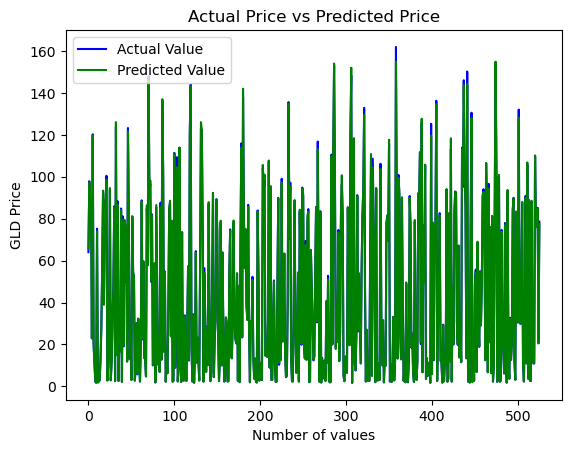

In [23]:
plt.plot(y_test, color='blue', label = 'Actual Value')
plt.plot(test_data_prediction, color='green', label='Predicted Value')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()

# Training the model using linear regression

In [24]:
from sklearn.linear_model import LinearRegression

In [25]:
model=LinearRegression()


In [26]:
model.fit(X_train,y_train)

LinearRegression()

In [27]:
y_pred = model.predict(X_test)

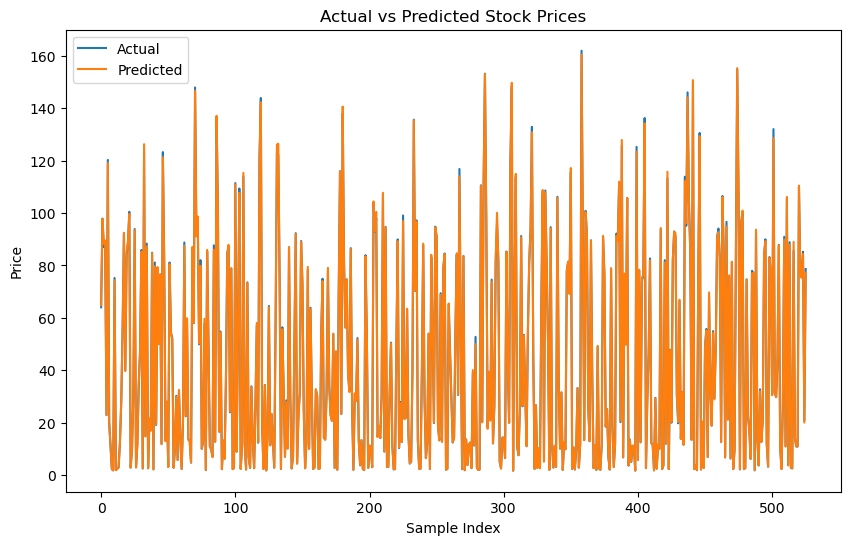

In [28]:
# Visualize the actual vs predicted prices
plt.figure(figsize=(10, 6))
plt.plot(y_test, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.title('Actual vs Predicted Stock Prices')
plt.xlabel('Sample Index')
plt.ylabel('Price')
plt.legend()
plt.show()

In [29]:
reg=LinearRegression()
reg.fit(X,y)

LinearRegression()

In [30]:
prediction=reg.predict(X)

In [31]:
prediction

array([ 2.67702017,  2.67687974,  2.58377086, ..., 89.39585418,
       89.22905816, 93.97098206])

In [32]:
Open=float(input("enter a value"))
High=float(input("enter a value"))
Low=float(input("enter a value"))

data = np.array([[Open,High,Low]])
pred_value = model.predict(data)[0]

print(pred_value)

enter a value45345
enter a value345
enter a value345
-26863.44870472515


C:\Users\reham\AppData\Local\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [34]:
import pickle
file=open("AMD_model.pkl",'wb')
pickle.dump(model,file)